# Copernicus Sentinel-2 datasets

In [1]:
%run -i lib/functions_lib.py

In [2]:
%run -i lib/bigearthnetv2_lib.py

In [3]:
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
print("Matplotlib version: %s"%matplotlib.__version__)
print("rasterio version: %s"%rasterio.__version__)

NumPy version: 1.26.4
GDAL version: 3.10.2
Matplotlib version: 3.8.4
rasterio version: 1.4.3


In [4]:
DATA_DIR = 'data'
sentinel2_data_file = 'S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE.zip'
dataset_name = sentinel2_data_file[:19]
dataset_name

'S2A_MSIL2A_20250823'

In [7]:
with ZipFile(f'{DATA_DIR}/{sentinel2_data_file}', 'r') as zipObj:
   zipObj.extractall(path=f'{DATA_DIR}/{dataset_name}')

In [5]:
bands_folder = pathlib.Path(DATA_DIR + '/' + dataset_name)
bands_folder.name

'S2A_MSIL2A_20250823'

In [6]:
main_sub_folder = [pathlib.Path(x) for x in bands_folder.iterdir() if x.is_dir()][0]
main_sub_folder

WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE')

In [7]:
granule_folder = main_sub_folder.joinpath('GRANULE')
granule_folder

WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE')

In [8]:
tile_folder = [pathlib.Path(x) for x in granule_folder.iterdir() if x.is_dir()][0]
tile_folder

WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627')

In [9]:
img_folder = tile_folder.joinpath('IMG_DATA/R10m')
img_folder

WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m')

In [10]:
r10m_bands = [pathlib.Path(band) for band in img_folder.iterdir()]
r10m_bands

[WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m/T33SVA_20250823T094121_AOT_10m.jp2'),
 WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m/T33SVA_20250823T094121_B02_10m.jp2'),
 WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m/T33SVA_20250823T094121_B03_10m.jp2'),
 WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m/T33SVA_20250823T094121_B04_10m.jp2'),
 WindowsPath('data/S2A_MSIL2A_20250823/S2A_MSIL2A_20250823T094121_N0511_R036_T33SVA_20250823T115213.SAFE/GRANULE/L2A_T33SVA_A053115_20250823T094627/IMG_DATA/R10m/T33SVA_20250823T094121_B08_10m.jp2'),


In [11]:
def get_raster_attributes(img_path):
    width = 0.0
    height = 0.0
    d_type = None
    crs = None
    transform = None
    with rasterio.open(img_path) as dataset:
        d_types = dataset.dtypes[0]
        print('dtypes: {}'.format(d_types))
        print('Number of bands: {:d}'.format(dataset.count))
        width = dataset.width
        height = dataset.height
        print('Band width: {:d}, band height: {:d}'.format(width, height))
        transform = dataset.transform
        print('Dataset affine transform:\n {}'.format(transform))
        crs = dataset.crs
        print('EPSG Coordinates Reference System: {}'.format(crs))
        bb_left = dataset.bounds.left
        bb_bottom = dataset.bounds.bottom
        bb_right = dataset.bounds.right
        bb_top = dataset.bounds.top
        print('Bounding box \n left: {:.2f}, \n bottom: {:.2f}, \n right: {:.2f}, \n top: {:.2f}'.format(bb_left, bb_bottom, bb_right, bb_top))                                                   
    return width, height, d_type, transform

In [12]:
r_band = r10m_bands[1]
g_band = r10m_bands[2]
b_band = r10m_bands[3]

In [13]:
get_raster_attributes(r_band)

dtypes: uint16
Number of bands: 1
Band width: 10980, band height: 10980
Dataset affine transform:
 | 10.00, 0.00, 399960.00|
| 0.00,-10.00, 4100040.00|
| 0.00, 0.00, 1.00|
EPSG Coordinates Reference System: EPSG:32633
Bounding box 
 left: 399960.00, 
 bottom: 3990240.00, 
 right: 509760.00, 
 top: 4100040.00


(10980,
 10980,
 None,
 Affine(10.0, 0.0, 399960.0,
        0.0, -10.0, 4100040.0))

In [14]:
def get_image_array(img_path):
    '''
    This function returns a NumPy array
    of the image. For one band it returns 
    a 2D array with shape (height, width).
    For a RGB image with three bands it 
    returns a 3D array with shape (channels, height, width) 
    '''
    with gdal.Open(img_path) as image_ds:
        image_array = image_ds.ReadAsArray()
    return image_array

In [15]:
r_band_array = get_image_array(r_band)
g_band_array = get_image_array(g_band)
b_band_array = get_image_array(b_band)
r_band_array.shape

(10980, 10980)

In [16]:
r_band_array.min()

0

In [17]:
r_band_array.max()

19760

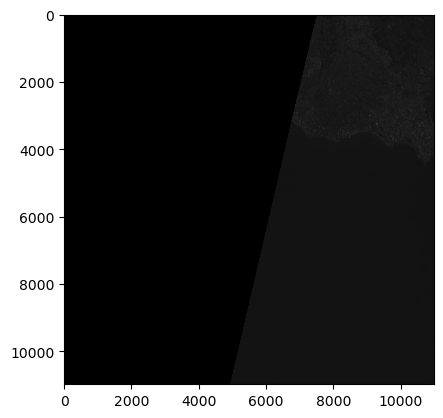

In [18]:
plt.imshow(r_band_array, cmap='gray')

In [20]:
r_tile_ds = gdal.Open(r_band)
num_bands = r_tile_ds.RasterCount
tile_cols = r_tile_ds.RasterXSize
tile_rows = r_tile_ds.RasterYSize
print('Tile {}\nNumber of bands: {}\nrows: {}\ncolumns: {}'.format(r_band.name, num_bands, tile_rows, tile_cols))

Tile T33SVA_20250823T094121_B02_10m.jp2
Number of bands: 1
rows: 10980
columns: 10980


In [22]:
tile_origin_x, res_x, row_rotation, tile_origin_y, col_rotation, res_y = r_tile_ds.GetGeoTransform()
print('Tile image\norigin x: {0:.2f} m.\norigin y: {1:.2f} m.\npixel resolution x: {2:.2f} m.\npixel resolution y: {3:.2f} m.\nrow rotation. {4:.2f}\ncol rotation: {5:.2f}'.format(tile_origin_x, 
                                                                                                                 tile_origin_y,
                                                                                                                 res_x,
                                                                                                                 abs(res_y),
                                                                                                                 row_rotation,
                                                                                                                 col_rotation))

Tile image
origin x: 399960.00 m.
origin y: 4100040.00 m.
pixel resolution x: 10.00 m.
pixel resolution y: 10.00 m.
row rotation. 0.00
col rotation: 0.00


In [23]:
tile_length_x = tile_cols * res_x
tile_length_y = tile_rows * abs(res_y)
tile_area = tile_length_x * tile_length_y / 1000**2 
print('Area represented in the tile image\nHorizontal length (x): {:.2f} m\nVertical length (y): {:.2f} m\nArea: {:.2f} km^2'.format(tile_length_x, 
                                                                                                                                abs(tile_length_y), 
                                                                                                                                tile_area))


Area represented in the tile image
Horizontal length (x): 109800.00 m
Vertical length (y): 109800.00 m
Area: 12056.04 km^2


In [24]:
patch_length_x = 1000.0
patch_length_y = 1000.0

In [25]:
max_num_patches_x = int(tile_length_x / patch_length_x)
max_num_patches_y = int(abs(tile_length_y) / patch_length_y)
print('Max number of patches in each direction\nx: {:d}\ny: {:d}'.format(max_num_patches_x, max_num_patches_y))

Max number of patches in each direction
x: 109
y: 109


In [26]:
patch_length_cols = round(patch_length_x / res_x)
patch_length_rows = round(patch_length_y / abs(res_y))
print('Patch size\nrows: {:d}\ncols: {:d}'.format(patch_length_rows, patch_length_cols))

Patch size
rows: 100
cols: 100


In [27]:
patch_index_x = 75
patch_index_y = 0

In [28]:
patch_origin_col = patch_index_x * patch_length_cols
patch_origin_row = patch_index_y * patch_length_rows
print('Patch origin\nrow: {:d}\ncol: {:d}'.format(patch_origin_row, patch_origin_col)) 

Patch origin
row: 0
col: 7500


In [29]:
g_tile_ds = gdal.Open(g_band)
b_tile_ds = gdal.Open(b_band)

In [30]:
r_patch_data = getRasterBands(r_tile_ds, patch_origin_col, patch_origin_row, patch_length_cols, patch_length_rows)[0]
g_patch_data = getRasterBands(g_tile_ds, patch_origin_col, patch_origin_row, patch_length_cols, patch_length_rows)[0]
b_patch_data = getRasterBands(b_tile_ds, patch_origin_col, patch_origin_row, patch_length_cols, patch_length_rows)[0]
bands = [r_patch_data, g_patch_data, b_patch_data]

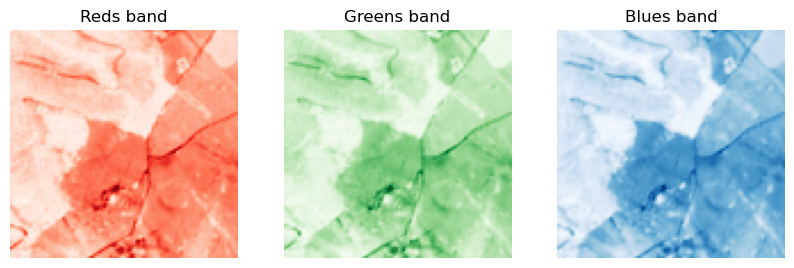

In [31]:
channel = ['Reds', 'Greens', 'Blues']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for i in range(0, 3):
    ax[i].set_title('%s band'%channel[i])
    ax[i].set_axis_off()
    ax[i].imshow(bands[i], cmap=channel[i])

In [32]:
def createPNG(band_array_list, target_path):
    '''
    This function creates a multiband PNG file from a list of GeoTIFF files 
    containing one band each. For an RGB file the source list shall contain three bands
    in the RGB order. For Sentinel-2 it is B04, B03, B02. The bin depth of each band is
    reduced from 16 bits to 8 bits. If the target file already exists
    it doesn't create a new one and will return 1, otherwise it will create a new raster
    and will return 0 
    '''
    SUCCESS = 0
    FAILURE = 1
    if (os.path.isfile(target_path)):
        return FAILURE 
        
    width = band_array_list[0].shape[0]
    height = band_array_list[0].shape[1]
    count = len(band_array_list)    
        
    with rasterio.open(target_path,
                    mode='w',
                    driver='PNG',
                    height=height,
                    width=width,
                    count=count,
                    dtype='uint16') as target_dataset:
        band_index = 1
        for band in band_array_list:
            target_dataset.write(normalize(band), band_index)
            band_index += 1
    
    return SUCCESS

In [33]:
createPNG(bands, 'data/rgb.png')

0

In [34]:
png_array = get_image_array('data/rgb.png')
png_array.dtype, png_array.shape

(dtype('uint16'), (3, 100, 100))

In [35]:
png_array_perm = np.moveaxis(png_array, 0, 2)
png_array_perm.shape

(100, 100, 3)

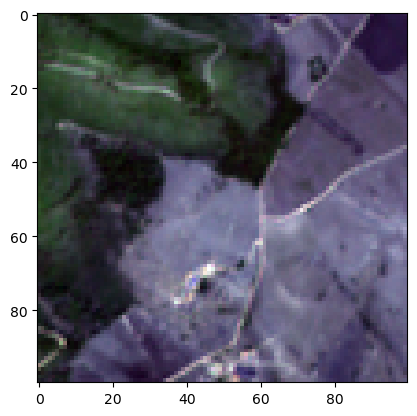

In [36]:
plt.imshow(png_array_perm)